In [1]:
import pandas as pd
import platform
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns
import platform
import numpy as np

In [2]:
# 그래프에서 한글을 표기하기 위해 글꼴 변경 
if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
elif platform.system() == 'Darwin':   # macOS
    rc('font',family = 'AppleGothic')
else:
    print('Check your OS system')

In [10]:
pd.set_option("display.max_rows", 4)
pd.set_option("display.max_columns", 10)

In [21]:
data = pd.read_csv('./data/final_data_before_winsorization.csv', index_col=0)
data.fillna(0, inplace=True)
data['1점포당_1년_매출액'] = data['1점포당_1년_매출액'].astype('int64')
data['행정동별_1년_매출액'] = data['행정동별_1년_매출액'].astype('int64')
data

,2023년09월_전체세대,2023년09월_1인세대,2023년09월_2인세대,2023년09월_3인세대,2023년09월_4인세대,...,2_기타,카페수,승하차인원_버스_지하철,1점포당_1년_매출액,행정동별_1년_매출액
행정동명,,,,,,,,,,,
가락1동,9836,1633,2492,2706,2438,...,4,43.0,184724.0,117503246,2350064937
가락2동,12375,3568,2746,2825,2641,...,8,74.0,190052.0,33727171,3305262777
...,...,...,...,...,...,...,...,...,...,...,...
휘경2동,12772,6871,2459,1705,1336,...,4,38.0,227224.0,19942268,1834688657
흑석동,13085,4821,2873,2698,2134,...,2,50.0,502230.0,29184023,4902916012


In [13]:
# 이상치 박스플롯으로 보여주는 함수 생성
import matplotlib.pyplot as plt 
import seaborn as sns

def show_outlier(data):
    plt.figure(figsize=(8, len(data.columns) * 1.5))

    for i, col in enumerate(data.columns, 1):
        # plt.rcParams['font.family'] = 'Malgun Gothic'
        plt.subplot(len(data.columns), 1, i)
        sns.boxplot(x=data[col])
        plt.title(col)

    plt.tight_layout()
    plt.show()

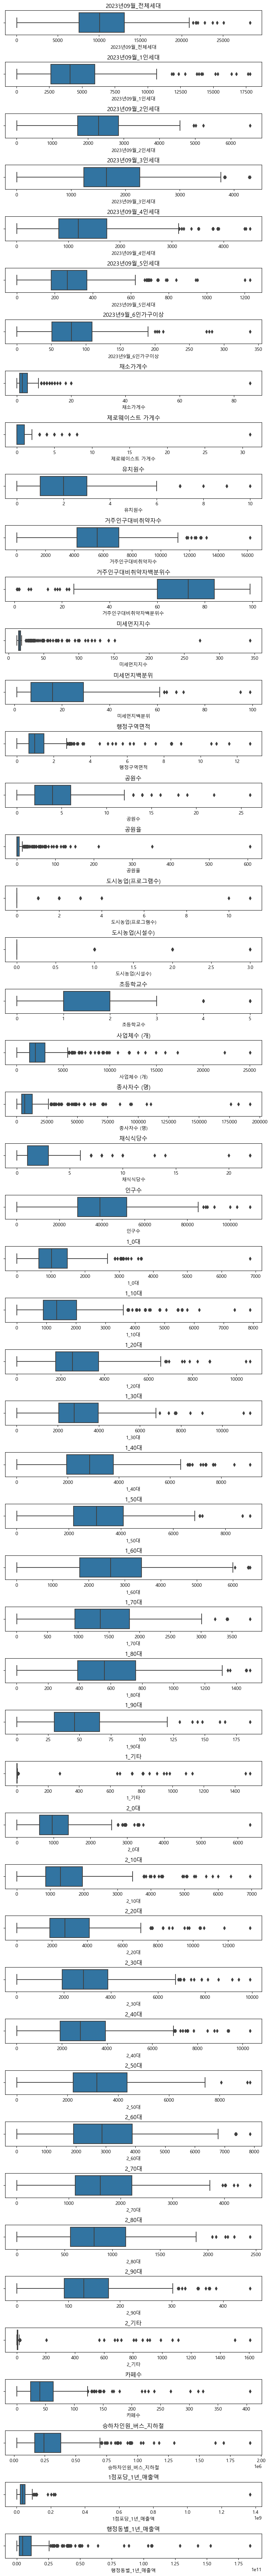

In [13]:
# 박스플랏으로 이상치 탐색 
show_outlier(data)

### winsorize 적용

In [14]:
from scipy.stats.mstats import winsorize

# 윈저라이즈 함수 생성하기_ 전체 데이터프레임
def winsor_outlier(data, percentile):
    winsorized_df = data.copy()
    for col in data.columns:
        winsorized_df[col] = winsorize(data[col].astype('int'),(percentile,percentile))
    return winsorized_df

# 윈저라이즈 적용
winsorized_df = data.copy()
cols = ['인구수', '행정동별_1년_매출액']
percentile = 0.03
for col in cols:
    winsorized_df[col] = winsorize(winsorized_df[col].astype('int64'),(percentile, percentile))

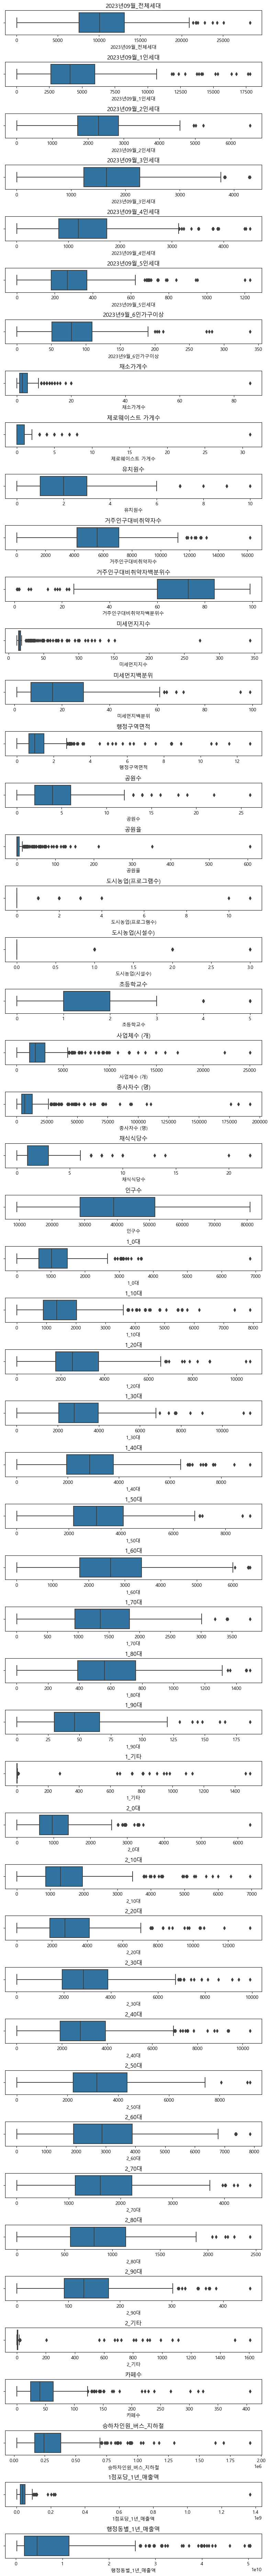

In [15]:
# 박스플랏으로 극단값 조정 확인 
show_outlier(winsorized_df)

### 파생변수 생성

- '1인세대' : 행정동 1인 세대수 / 행정동 전체 세대수
- '총_10대' : 0세 ~ 19세 인구수 / 행정동 전체 인구수
- '총_20_30대': 20세 ~ 39세 / 행정동 전체 인구수
- '총_40_50대' : 40세 ~ 59세 / 행정동 전체 인구수
- '총_60대이상' : 60세 이상 / 행정동 전체 인구수
- '유치원_초등학교' : 유치원 수와 초등학교 수 / 행정동 전체 인구수
- '거주_유동_인구당_매출액' : ('행정동별_1년_매출액' / 365일) / (행정동 전체 인구수 + 일일 지하철, 버스 승하차 인원)

In [16]:
# 1인 세대 비율 구하기
winsorized_df['1인세대_(수)'] = winsorized_df['2023년09월_1인세대']
winsorized_df['1인세대'] = winsorized_df['2023년09월_1인세대'] / winsorized_df['2023년09월_전체세대']

# 인구 합치기_(수)
winsorized_df['총_10대_(수)'] = winsorized_df['1_10대'] + winsorized_df['2_10대']
winsorized_df['총_20_30대_(수)'] = winsorized_df['1_20대'] + winsorized_df['1_30대'] + winsorized_df['2_20대'] + winsorized_df['2_30대']
winsorized_df['총_40_50대_(수)'] = winsorized_df['1_40대'] + winsorized_df['1_50대'] +  + winsorized_df['2_40대'] + winsorized_df['2_50대']
winsorized_df['총_60대이상_(수)'] = winsorized_df['1_60대'] + winsorized_df['1_70대'] + winsorized_df['1_80대'] + winsorized_df['1_90대'] + winsorized_df['1_기타'] + winsorized_df['2_60대'] + winsorized_df['2_70대'] + winsorized_df['2_80대'] + winsorized_df['2_90대'] + winsorized_df['2_기타']

# 인구 합치기_ (비율)
winsorized_df['총_10대'] = (winsorized_df['1_10대'] + winsorized_df['2_10대']) / winsorized_df['인구수']
winsorized_df['총_20_30대'] = (winsorized_df['1_20대'] + winsorized_df['1_30대'] + winsorized_df['2_20대'] + winsorized_df['2_30대']) / winsorized_df['인구수']
winsorized_df['총_40_50대'] = (winsorized_df['1_40대'] + winsorized_df['1_50대'] +  + winsorized_df['2_40대'] + winsorized_df['2_50대']) / winsorized_df['인구수']
winsorized_df['총_60대이상'] = (winsorized_df['1_60대'] + winsorized_df['1_70대'] + winsorized_df['1_80대'] + winsorized_df['1_90대'] + winsorized_df['1_기타'] + winsorized_df['2_60대'] + winsorized_df['2_70대'] + winsorized_df['2_80대'] + winsorized_df['2_90대'] + winsorized_df['2_기타']) / winsorized_df['인구수']

# 유치원, 초등학교 합계 구하기_(수),_(비율)
winsorized_df['유치원_초등학교_(수)'] = winsorized_df['유치원수'] + winsorized_df['초등학교수'] 
winsorized_df['유치원_초등학교'] = (winsorized_df['유치원수'] + winsorized_df['초등학교수']) / winsorized_df['인구수']

# 동 별 매출액 / 거주인구 + 유동인구
winsorized_df['행정동별_1년_매출액'] = winsorized_df['행정동별_1년_매출액'].astype('int64')
winsorized_df['거주_유동_인구당_매출액'] = (winsorized_df['행정동별_1년_매출액']/365) / (winsorized_df['인구수'] + winsorized_df['승하차인원_버스_지하철'])

winsorized_df.head(2)

,2023년09월_전체세대,2023년09월_1인세대,2023년09월_2인세대,2023년09월_3인세대,2023년09월_4인세대,2023년09월_5인세대,2023년9월_6인가구이상,채소가게수,제로웨이스트 가게수,유치원수,...,총_20_30대_(수),총_40_50대_(수),총_60대이상_(수),총_10대,총_20_30대,총_40_50대,총_60대이상,유치원_초등학교_(수),유치원_초등학교,거주_유동_인구당_매출액
행정동명,,,,,,,,,,,,,,,,,,,,,
가락1동,9836,1633,2492,2706,2438,449,118,10.0,0.0,1.0,...,15010,17080,11642,0.095664,0.272572,0.310162,0.211411,3.0,0.000054,26.850496
가락2동,12375,3568,2746,2825,2641,453,142,3.0,0.0,4.0,...,17364,20426,14158,0.104766,0.277141,0.326013,0.225971,6.0,0.000096,35.834189


In [17]:
winsorized_df.to_csv('./data/final_data_after_winsorization.csv')